                                              Курсова робота
                                                   
                                 Знайомство з можливостями Anaconda/IPython, 
               отримання досвіду використання основних засобів аналізу та візуалізації даних у середовищі IPython

1. Що таке Anaconda?

Anaconda - це платформа та дистрибутив відкритого програмного забезпечення, який призначений для роботи з мовами програмування Python та R. Цей інструментарій розробляється компанією Anaconda, Inc., і включає в себе широкий набір популярних бібліотек та інструментів для наукових обчислень, аналізу даних та розробки штучного інтелекту.

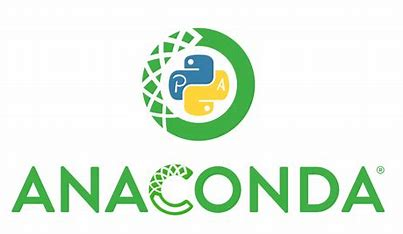

In [ ]:
1.1 Складові 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [3]:
df.head() 

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
# check NaN
df.isnull().values.any()

True

In [5]:
df = df.fillna(method='ffill')  

C:\Users\Анастасія\AppData\Local\Temp\ipykernel_16096\856610927.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [6]:
df.isnull().values.any()

False

In [7]:
# Matrix
selected_data = df[['mpg', 'cylinders', 'displacement', 'horsepower']].head(10)

max_vals = selected_data.max()
min_vals = selected_data.min()

result_matrix = pd.concat([max_vals, min_vals], axis=1)
result_matrix.columns = ['max val', 'min val']

def highlight_max_min(val):
    is_max = val == max_vals
    is_min = val == min_vals
    styles = ['background-color: green' if m else 'background-color: red' if n else '' for m, n in zip(is_max, is_min)]
    return styles

styled_result_matrix = result_matrix.style.apply(highlight_max_min, axis=0)
styled_result_matrix

,max val,min val
mpg,18.000000,14.000000
cylinders,8.000000,8.000000
displacement,455.000000,302.000000
horsepower,225.000000,130.000000


In [8]:
# Mat Expectation
non_numeric_columns = ['name', 'origin']
df_matexp = df.drop(non_numeric_columns, axis=1)

mean_values = df_matexp.mean()
mean_values

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.178392
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64

In [9]:
# dispersion
dispersion = df.var(numeric_only=True)
dispersion

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1466.494545
weight          717140.990526
acceleration         7.604848
model_year          13.672443
dtype: float64

In [10]:
#standard data
numeric_columns = df.select_dtypes(include=[float, int])
df_standart=df.copy()
df_standart[numeric_columns.columns] = ((numeric_columns - numeric_columns.mean()) / numeric_columns.std()).round(2)
print("standard data:")
print(df_standart)

standard data:
                          name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu -0.71       1.50          1.09        0.67   
1            buick skylark 320 -1.09       1.50          1.50        1.59   
2           plymouth satellite -0.71       1.50          1.19        1.20   
3                amc rebel sst -0.96       1.50          1.06        1.20   
4                  ford torino -0.83       1.50          1.04        0.94   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  0.45      -0.86         -0.51       -0.47   
394                  vw pickup  2.62      -0.86         -0.92       -1.36   
395              dodge rampage  1.09      -0.86         -0.56       -0.53   
396                ford ranger  0.57      -0.86         -0.70       -0.66   
397                 chevy s-10  0.96      -0.86         -0.71       -0.58   

     weight  acceleration  model_year  origin  
0      0.63 

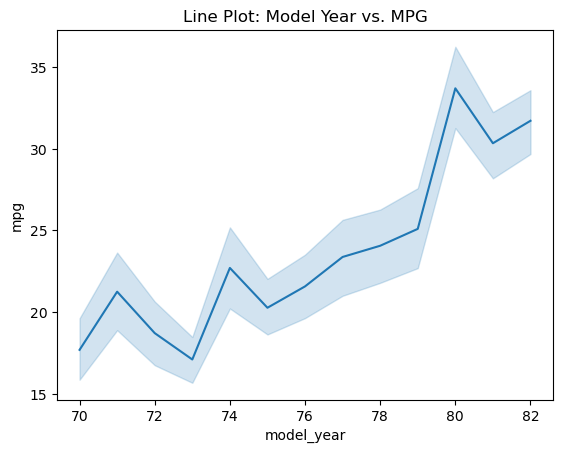

In [11]:
# Line Plot
sns.lineplot(x="model_year", y="mpg", data=df)
plt.title('Line Plot: Model Year vs. MPG')
plt.show()

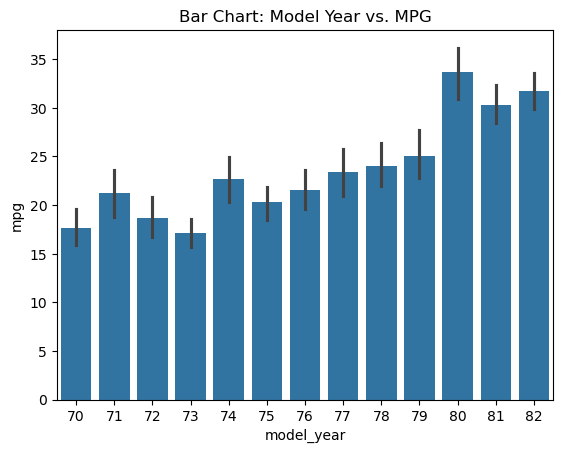

In [12]:
# Bar Chart
sns.barplot(x="model_year", y="mpg", data=df)
plt.title('Bar Chart: Model Year vs. MPG')
plt.show()

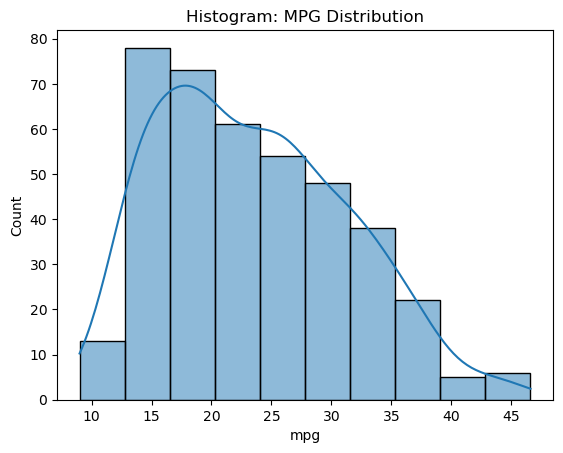

In [13]:
# Histogram
sns.histplot(df['mpg'], bins=10, kde=True)
plt.title('Histogram: MPG Distribution')
plt.show()

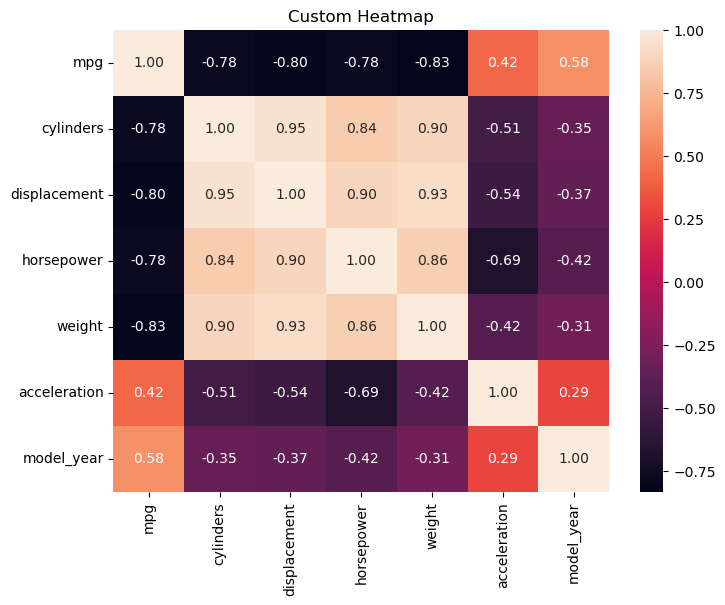

In [14]:
#Heatmap
num=df.select_dtypes(include=[float, int])
plt.figure(figsize=(8, 6))
sns.heatmap(num.corr(), annot=True, fmt=".2f")
plt.title('Custom Heatmap')
plt.show()

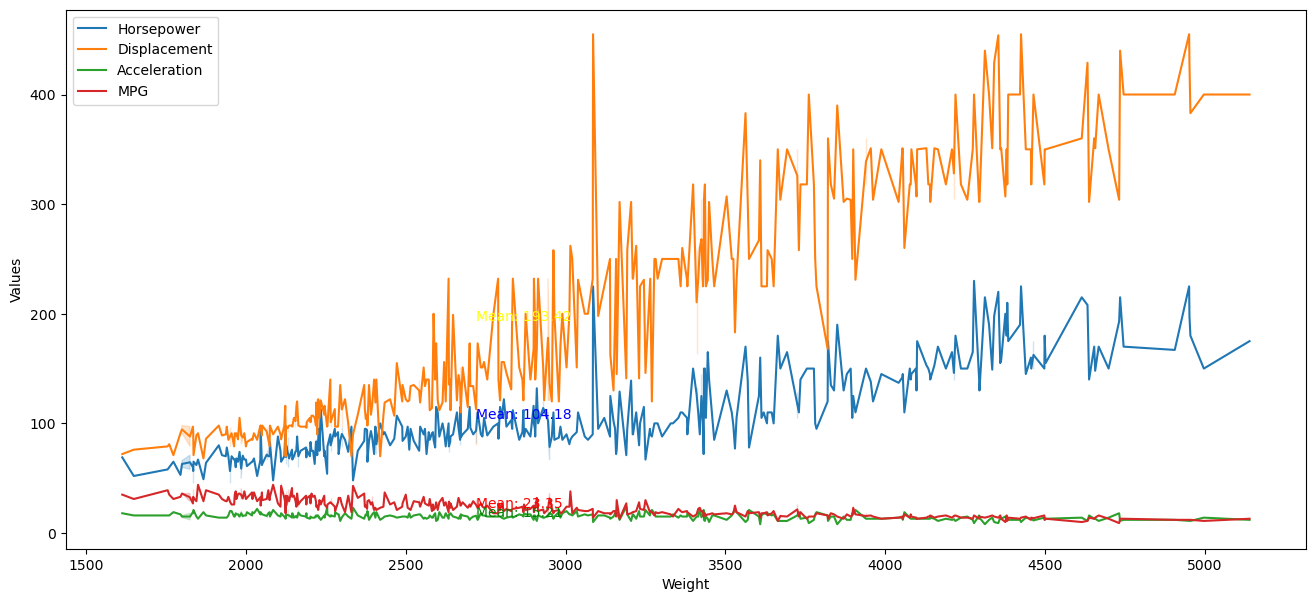

In [16]:
# Преобразование столбцов в целые числа
y1 = df['horsepower'].astype(int)
x = df['weight'].astype(int)
y2 = df['displacement'].astype(int)
y3 = df['acceleration'].astype(int)
y4 = df['mpg'].astype(int)

# Создаем график
plt.figure(figsize=(16, 7))

# Рисуем линейные графики
sns.lineplot(x=x, y=y1, label='Horsepower')
sns.lineplot(x=x, y=y2, label='Displacement')
sns.lineplot(x=x, y=y3, label='Acceleration')
sns.lineplot(x=x, y=y4, label='MPG')

# Добавляем аннотации средних значений для каждого графика
for line, color in zip([y1, y2, y3, y4], ['blue', 'orange', 'green', 'red']):
    mean_value = np.mean(line)
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(x.iloc[-1], mean_value), color=color)

# Добавляем легенду и подписи осей
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Values')

# Показываем график
plt.show()

C:\Users\Анастасія\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


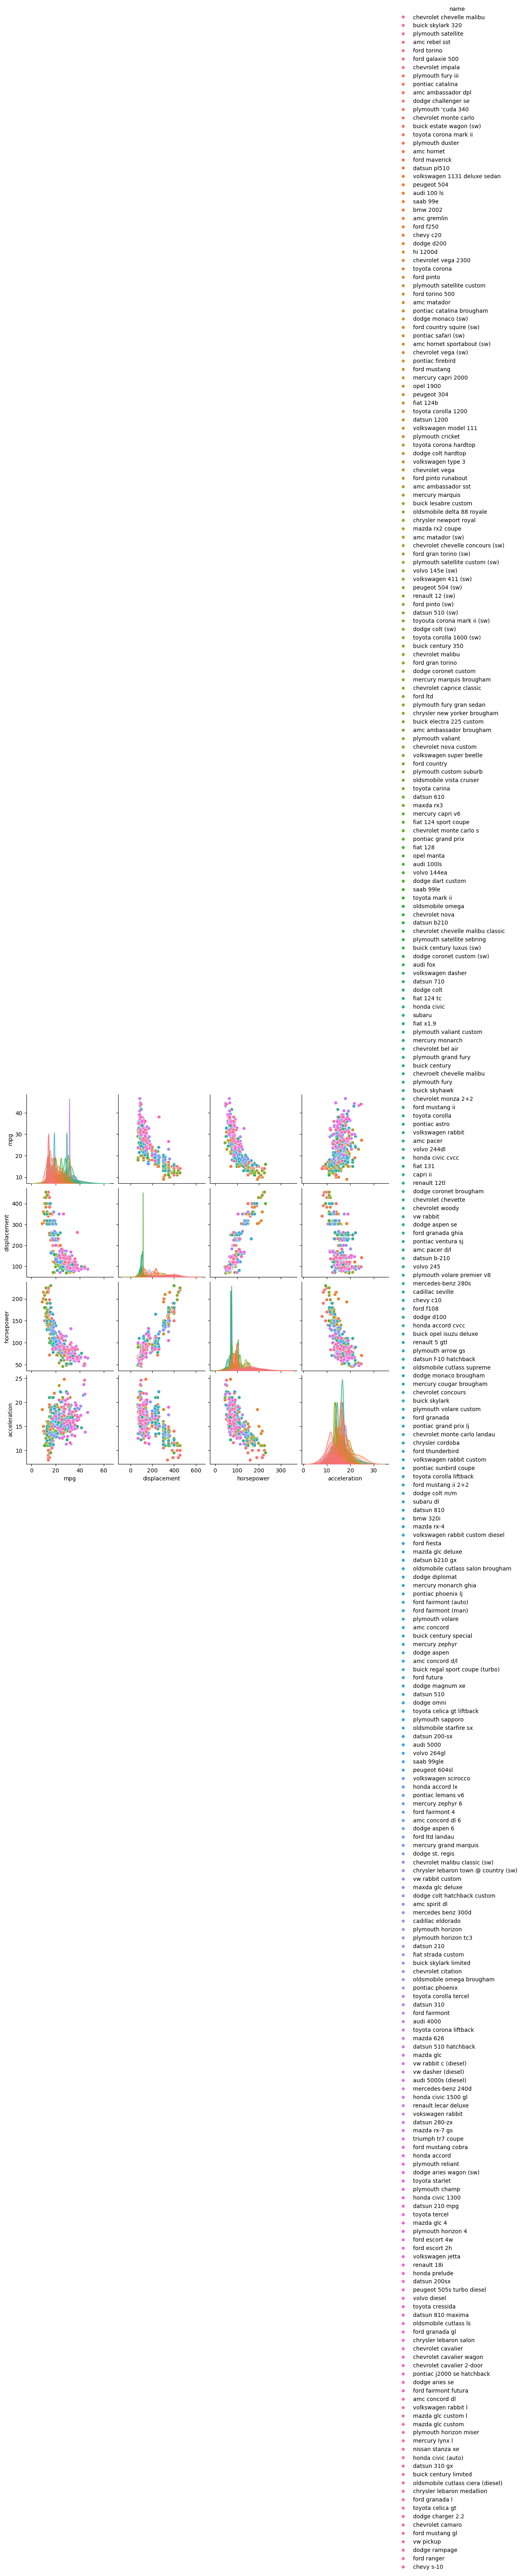

In [17]:
# df_pairplot=df.drop['cylinders']
# df_pairplot=df.drop['weight']
#print(df_pairplot)
sns.pairplot(df.drop(['cylinders', 'weight','model_year','origin'], axis=1), hue='name')


In [18]:
df_col=df.copy()
df_col.corr(method="pearson", numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.777685,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842627,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897192,0.932824,-0.543684,-0.370164
horsepower,-0.777685,0.842627,0.897192,1.000000,0.864040,-0.686334,-0.417302
weight,-0.831741,0.896017,0.932824,0.864040,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686334,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.417302,-0.306564,0.288137,1.000000


C:\Users\Анастасія\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


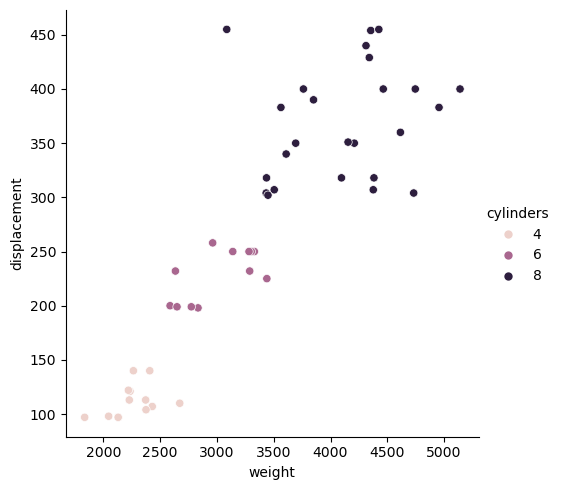

In [19]:
sns.relplot(df_col.head(50), x='weight', y='displacement', hue='cylinders')

In [20]:
df_col = df_col.dropna()
df_col = df_col.astype({'mpg': float,
     'cylinders': int,
     'displacement': float,
     'horsepower': float,
     'weight': int,
     'model_year':int,
     'acceleration': float})
df_col.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

                          name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0         NaN   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8           NaN         NaN   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0         NaN   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4           NaN        82.0   

     weight  acceleration  model_year  origin  
0    3504.0          12.0  

C:\Users\Анастасія\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


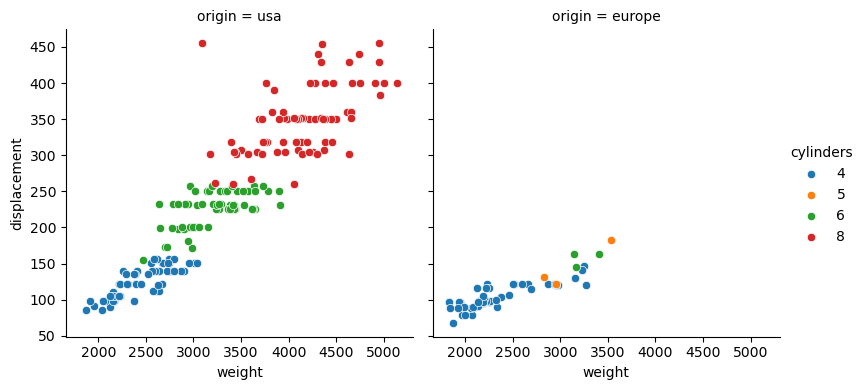

In [22]:

# Обчислюємо кореляції між ознаками
correlation_matrix = df_col.corr(method="pearson", numeric_only=True)

# Знаходимо пари ознак з найвищою кореляцією (вибираємо тільки верхній трикутник матриці кореляції)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1) == bool)
highly_correlated = (upper_triangle.abs() > 0.8).any()

# Видаляємо 10% випадкових значень для вибраних ознак
for feature in highly_correlated[highly_correlated].index:
    mask = np.random.rand(len(df_col)) < 0.9
    df_col.loc[~mask, feature] = np.nan

    
# Виводимо кореляцію після видалення випадкових значень
print(df_col)
print("Кореляція після видалення випадкових значень:")
print(df_col.corr(method="pearson", numeric_only=True))

# Побудова multiple scatterplot за допомогою FacetGrid
g = sns.FacetGrid(df_col[(df_col['origin'] == "usa") | (df_col['origin'] == "europe")], col='origin', hue='cylinders', height=4)
g.map(sns.scatterplot, 'weight', 'displacement')
g.add_legend()
plt.show()